In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import create_engine, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [6]:
# data=engine.execute("SELECT * FROM measurement")
# for record in data:
#     print (record)
# columns = inspector.get_columns('measurement')
# for column in columns:
#     print(column["name"], column["type"])
# data=engine.execute("SELECT * FROM station")
# for record in data:
#     print (record)  
# columns = inspector.get_columns('station')
# for column in columns:
#     print(column["name"], column["type"])

In [7]:
# reflect an existing database into a new model

Base = automap_base()
Base.prepare(engine, reflect=True)


# reflect the tables


In [8]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
measurement = Base.classes.measurement
station=Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)
conn=engine.connect()

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()


('2017-08-23',)

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
 
year_ago_date=dt.date (2017,8,23)-dt.timedelta(days=365)
print("Query Date:", year_ago_date)



Query Date: 2016-08-23


In [14]:
# Perform a query to retrieve the data and precipitation scores

date_prcp=session.query(measurement.date,measurement.prcp).\
    filter(measurement.date>'2016-08-23').\
    order_by(measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
date_prcp_df=pd.DataFrame(date_prcp,columns=['date','prcp'])

date_prcp_df.set_index('date',inplace=True)
date_prcp_df.head(30)




# Sort the dataframe by date
date_prcp_df.sort_values(by='date', ascending=False)

date_prcp_df.head(10)



,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22
2016-08-24,2.15
2016-08-24,1.45
2016-08-25,0.08
2016-08-25,0.08


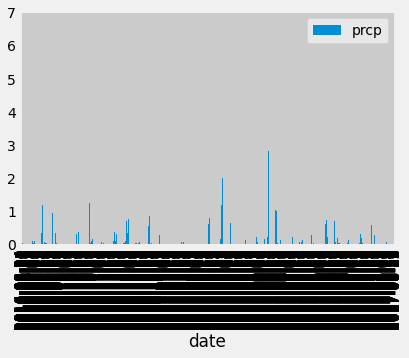

In [20]:
# Use Pandas Plotting with Matplotlib to plot the data
date_prcp_df.plot(kind="bar")


# plt.legend(['precipitation'])
# plt.set_xlabel('Dates')
# plt.set_ylabel('Inches')
# plt.tight_layout()
plt.xticks(rotation=90)
plt.show()



In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data
summary= date_prcp_df.describe()
  
# display
summary

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [16]:
# Design a query to calculate the total number stations in the dataset
session.query(station.station).count()
active_stations=session.query(measurement.station).group_by(measurement.station).count()
active_stations

9

In [17]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
Temperature = session.query(measurement.station).all()
station_temp_df=pd.DataFrame(Temperature,columns=['station'])
station_temp_df.head()
station_temp_df.value_counts('station')


station
USC00519281    2772
USC00519397    2724
USC00513117    2709
USC00519523    2669
USC00516128    2612
USC00514830    2202
USC00511918    1979
USC00517948    1372
USC00518838     511
dtype: int64

In [18]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
Temp_summary = [measurement.station,func.min(measurement.tobs), 
       func.max(measurement.tobs), 
       func.avg(measurement.tobs)] 
     
Temp = session.query(*Temp_summary).filter(measurement.station=='USC00519281').all()
Temp


[('USC00519281', 54.0, 85.0, 71.66378066378067)]

array([[<AxesSubplot:title={'center':'Temp'}>]], dtype=object)

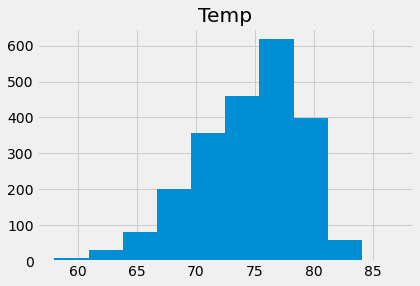

In [19]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
date_temp=session.query(measurement.tobs).\
    filter(measurement.date>'2016-08-23').all()
date_temp_df = pd.DataFrame(date_temp, columns=['Temp'])

date_temp_df.hist(column='Temp')

# Close session

In [25]:
# Close Session
session.close()